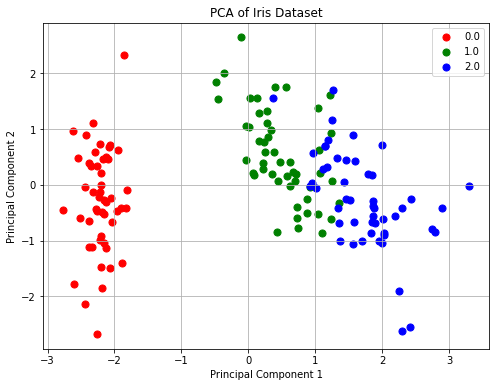

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['species'])

# Separate features (X) and target variable (y)
X = data.drop('species', axis=1)
y = data['species']

# Standardize the features
X_std = (X - X.mean()) / X.std()

# Step 1: Calculate the covariance matrix X of data points
cov_matrix = np.cov(X_std.T)

# Step 2: Calculate eigen vectors and corresponding eigen values
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# Step 3: Sort the eigen vectors according to their eigen values in decreasing order
sorted_indices = np.argsort(eigen_values)[::-1]
sorted_eigen_values = eigen_values[sorted_indices]
sorted_eigen_vectors = eigen_vectors[:, sorted_indices]

# Step 4: Choose first k eigen vectors and that will be the new k dimensions
k = 2  # Number of dimensions to reduce to
selected_eigen_vectors = sorted_eigen_vectors[:, :k]

# Step 5: Transform the original n-dimensional data points into k dimensions
X_pca = X_std.dot(selected_eigen_vectors)

# Plot the data
plt.figure(figsize=(8, 6))
targets = data['species'].unique()
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = y == target
    plt.scatter(X_pca.loc[indicesToKeep, 0],
                X_pca.loc[indicesToKeep, 1],
                c=color,
                s=50)
plt.legend(targets)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.grid()
plt.show()
